# Klasifikasi Gambar Anjing dan Kucing Menggunakan CNN dengan TensorFlow


## Import Library

In [ ]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import pathlib
import os

print("TensorFlow version:", tf.__version__)
print("Using CPU for training")

TensorFlow version: 2.18.0
Using CPU for training


## Fungsi Load Dataset

In [ ]:

def load_dataset(dataset_path):
    """
    Memuat dataset dari direktori yang berisi subfolder untuk setiap kelas
    
    Args:
        dataset_path (str): Path ke direktori dataset
    
    Returns:
        tuple: (images, labels) - Array gambar dan labelnya
    """
    images = []
    labels = []
    
    # Loop melalui setiap subfolder (kelas)
    for fruit_name in os.listdir(dataset_path):
        fruit_path = os.path.join(dataset_path, fruit_name)
        if os.path.isdir(fruit_path):
            print(f"Loading images from class: {fruit_name}")
            # Loop melalui setiap gambar dalam subfolder
            for img_name in os.listdir(fruit_path):
                img_path = os.path.join(fruit_path, img_name)
                # Baca dan resize gambar
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (64, 64))
                images.append(img)
                labels.append(fruit_name)
    
    return np.array(images), np.array(labels)


## Download Dataset

In [ ]:

import os
import zipfile

# URL dataset
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
dataset_name = "cats_and_dogs_filtered.zip"

# Download dataset
try:
    data_dir = tf.keras.utils.get_file(dataset_name, origin=dataset_url)
    print(f"Dataset berhasil didownload ke: {data_dir}")
except Exception as e:
    print(f"Error saat mendownload dataset: {str(e)}")
    raise

# Ekstrak dataset
try:
    base_dir = os.path.dirname(data_dir)
    
    # Cek apakah sudah diekstrak
    if not os.path.exists(os.path.join(base_dir, 'cats_and_dogs_filtered')):
        print("\nMengekstrak dataset...")
        with zipfile.ZipFile(data_dir, 'r') as zip_ref:
            zip_ref.extractall(base_dir)
        print("Dataset berhasil diekstrak")
    else:
        print("\nDataset sudah diekstrak sebelumnya")

    # Set path
    data_dir = os.path.join(base_dir, 'cats_and_dogs_filtered')
    train_dir = os.path.join(data_dir, 'train')
    validation_dir = os.path.join(data_dir, 'validation')
    
    # Verifikasi struktur direktori
    print("\nStruktur direktori:")
    print(f"Data directory: {data_dir}")
    print(f"Training directory: {train_dir}")
    print(f"Validation directory: {validation_dir}")
    
    # Cek jumlah file
    print("\nJumlah file dalam direktori:")
    print("Training cats:", len(os.listdir(os.path.join(train_dir, 'cats'))))
    print("Training dogs:", len(os.listdir(os.path.join(train_dir, 'dogs'))))
    print("Validation cats:", len(os.listdir(os.path.join(validation_dir, 'cats'))))
    print("Validation dogs:", len(os.listdir(os.path.join(validation_dir, 'dogs'))))

except Exception as e:
    print(f"\nError saat mengekstrak atau memverifikasi dataset: {str(e)}")
    print("\nSaran troubleshooting:")
    print("1. Coba hapus file zip yang didownload dan download ulang")
    print("2. Pastikan ada cukup ruang disk")
    print("3. Cek permission direktori")
    raise

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
Dataset berhasil didownload ke: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered.zip

Mengekstrak dataset...
Dataset berhasil diekstrak

Struktur direktori:
Data directory: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered
Training directory: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\train
Validation directory: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\validation

Jumlah file dalam direktori:
Training cats: 1000
Training dogs: 1000
Validation cats: 500
Validation dogs: 500


## Konfigurasi Parameter

In [ ]:

IMG_HEIGHT = 160
IMG_WIDTH = 160
BATCH_SIZE = 32
EPOCHS = 15
NUM_CLASSES = 2

## Persiapan Dataset dengan Augmentasi

In [ ]:

# Cek struktur direktori
print("Checking directory structure...")
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(validation_dir)}")

# Tampilkan struktur direktori
print("\nDirectory structure:")
for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"\nPath: {dirpath}")
    print(f"Subdirectories: {dirnames}")
    print(f"Number of files: {len(filenames)}")

# Persiapkan dataset dengan penanganan error
try:
    print("\nMemuat dataset training...")
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_dir,
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        shuffle=True
    )
    
    print("\nMemuat dataset validasi...")
    val_ds = tf.keras.utils.image_dataset_from_directory(
        validation_dir,
        seed=123,
        image_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        shuffle=True
    )
    
    class_names = train_ds.class_names
    print("\nNama kelas:", class_names)
    print(f"Jumlah kelas: {len(class_names)}")
    
    # Data augmentation untuk mencegah overfitting
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ])
    
    print("\nData augmentation layer berhasil dibuat")
    
except Exception as e:
    print(f"\nError saat memuat dataset: {str(e)}")
    print("\nMencoba alternatif loading dataset...")
    
    # Alternatif cara memuat dataset jika cara pertama gagal
    try:
        # Membuat ulang path dengan cara yang berbeda
        base_dir = os.path.dirname(data_dir)
        dataset_name = 'cats_and_dogs_filtered'
        train_dir = os.path.join(base_dir, dataset_name, 'train')
        validation_dir = os.path.join(base_dir, dataset_name, 'validation')
        
        print(f"\nMencoba path alternatif:")
        print(f"Train dir: {train_dir}")
        print(f"Validation dir: {validation_dir}")
        
        train_ds = tf.keras.utils.image_dataset_from_directory(
            train_dir,
            seed=123,
            image_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            shuffle=True
        )
        
        val_ds = tf.keras.utils.image_dataset_from_directory(
            validation_dir,
            seed=123,
            image_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            shuffle=True
        )
        
        class_names = train_ds.class_names
        print("\nNama kelas:", class_names)
        print(f"Jumlah kelas: {len(class_names)}")
        
        # Data augmentation untuk mencegah overfitting
        data_augmentation = tf.keras.Sequential([
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomZoom(0.2),
        ])
        
        print("\nData augmentation layer berhasil dibuat")
        
    except Exception as e:
        print(f"\nError pada alternatif loading: {str(e)}")
        print("\nSaran troubleshooting:")
        print("1. Pastikan dataset sudah terdownload dengan benar")
        print("2. Cek struktur direktori dataset")
        print("3. Pastikan direktori memiliki permission yang benar")
        print("4. Coba download ulang dataset")
        raise

Checking directory structure...
Train directory exists: True
Validation directory exists: True

Directory structure:

Path: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered
Subdirectories: ['train', 'validation']
Number of files: 1

Path: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\train
Subdirectories: ['cats', 'dogs']
Number of files: 0

Path: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\train\cats
Subdirectories: []
Number of files: 1000

Path: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\train\dogs
Subdirectories: []
Number of files: 1000

Path: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\validation
Subdirectories: ['cats', 'dogs']
Number of files: 0

Path: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\validation\cats
Subdirectories: []
Number of files: 500

Path: C:\Users\USER\.keras\datasets\cats_and_dogs_filtered\validation\dogs
Subdirectories: []
Number of files: 500

Memuat dataset training...
Found 2000 files belonging to 2 classes

## Visualisasi Data Augmentation

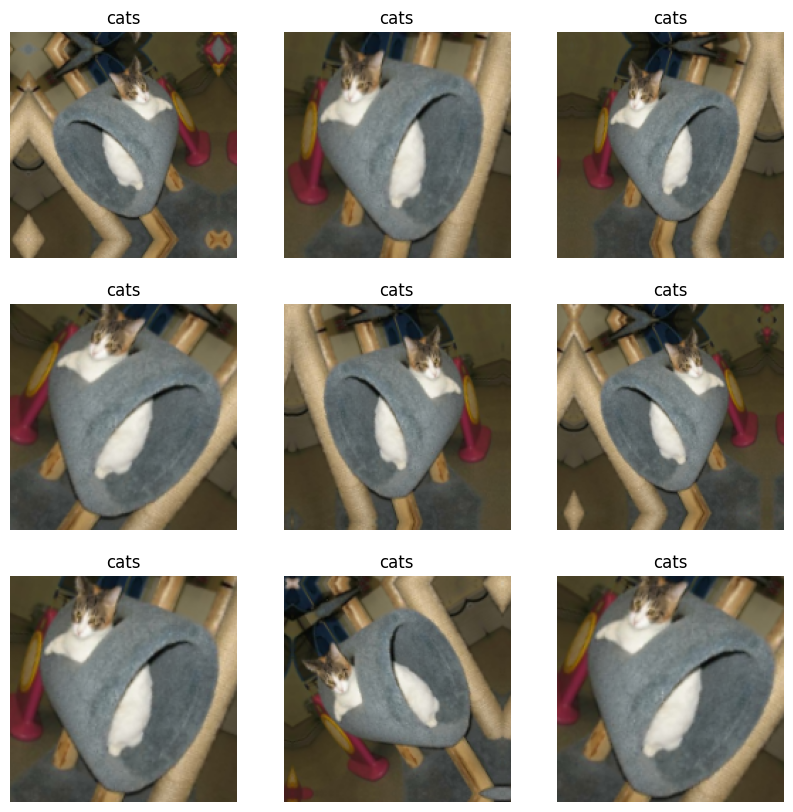

In [ ]:

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()

## Optimasi Performa Dataset

In [ ]:

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Membangun Model CNN

In [ ]:

def create_model():
    model = models.Sequential([
        # Data Augmentation
        data_augmentation,
        
        # Normalisasi input
        layers.Rescaling(1./255),
        
        # Convolutional layers
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        
        layers.Conv2D(128, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        
        layers.Conv2D(256, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        
        # Dense layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(NUM_CLASSES)
    ])
    return model

model = create_model()

## Ringkasan Model

In [ ]:

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (32, 160, 160, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 160, 160, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 80, 80, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 80, 80, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 80, 80, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 40, 40, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 40, 40, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 40, 40, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (32, 20, 20, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 20, 20, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 10, 10, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (32, 10, 10, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 25600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 512)              │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 2)                │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,497,154 (51.49 MB)

 Trainable params: 13,497,154 (51.49 MB)

 Non-trainable params: 0 (0.00 B)

## Kompilasi Model

In [ ]:

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

## Training Model dengan Callback

In [ ]:

# Menambahkan Early Stopping untuk mencegah overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 559ms/step - accuracy: 0.5275 - loss: 0.8425 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 536ms/step - accuracy: 0.4982 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 622ms/step - accuracy: 0.4956 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 649ms/step - accuracy: 0.4792 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 643ms/step - accuracy: 0.4932 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - accuracy: 0.4924 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 629ms/step - accuracy: 0.4925 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 39s 620ms/step - accuracy: 0.5059 - loss: 0.6930 - val_accu

## Visualisasi Hasil Training

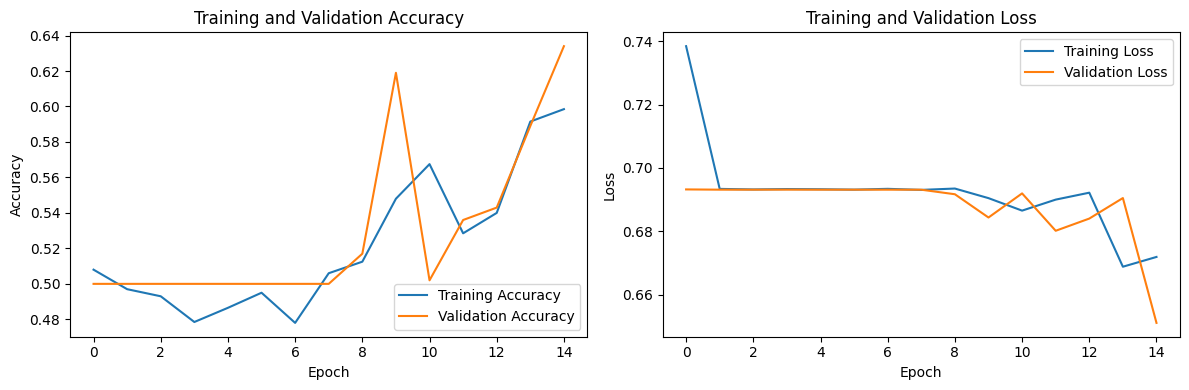

In [ ]:

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_trained = len(acc)
    epochs_range = range(epochs_trained)
    
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)

## Fungsi untuk Prediksi

In [ ]:

def predict_image(model, image_path):
    """
    Melakukan prediksi pada gambar baru
    
    Args:
        model: Model yang sudah dilatih
        image_path: Path ke gambar yang akan diprediksi
    """
    img = tf.keras.utils.load_img(
        image_path,
        target_size=(IMG_HEIGHT, IMG_WIDTH)
    )
    
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(
        f"Prediksi: {class_names[np.argmax(score)]} ({100 * np.max(score):.2f}% confident)"
    )
    plt.axis('off')
    plt.show()
    
    return class_names[np.argmax(score)], 100 * np.max(score)

## Menyimpan Model ke File

In [ ]:

model.save('cats_and_dogs_cnn_model.h5')  # Format HDF5
print("Model berhasil disimpan dalam file 'cats_and_dogs_cnn_model.h5'")

Model berhasil disimpan dalam file 'cats_and_dogs_cnn_model.h5'
